In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# problem1

In [2]:
Eqs=pd.read_csv("Sig_Eqs.tsv",sep='\t')

## 1.1

In [3]:
Eqs.groupby("Country").sum()['Deaths'].nlargest(10)

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64

## 1.2

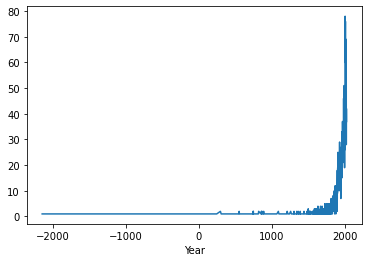

In [4]:
Eqs[Eqs['Mag']>0.6].groupby('Year').count()['Mag'].plot()

## 1.3

In [5]:
def CountEq_LargestEq(eqs,country,):
    country_eqs=eqs[eqs['Country']==country]
    max_mag=country_eqs[country_eqs['Mag']==country_eqs['Mag'].max()]
    timeList=[]
    for index, row in max_mag.iterrows():
        if row['Year']<0:
            year='BC '+str(int(abs(row['Year'])))
        else:
            year=str(int(row['Year']))
        if pd.notnull(row['Mo']):
            year=year+'-'+str(int(row['Mo']))
            if pd.notnull(row['Dy']):
                year=year+'-'+str(int(row['Dy']))
        timeList.append(year)
    result=pd.DataFrame({'Country':country,'Count':country_eqs.count()['Mag'],'Date':timeList})
    return result 

resultDf=pd.DataFrame(columns=['Country','Count','Date'])
Eqs.dropna(subset = ['Country'])
for country in Eqs['Country'].unique():
    result=CountEq_LargestEq(Eqs,country)
    resultDf=pd.concat([resultDf,result])
print(resultDf.sort_values('Count', ascending=False))

             Country Count        Date
0              CHINA   589   1668-7-25
0              JAPAN   351   2011-3-11
0          INDONESIA   331  2004-12-26
0               IRAN   259   856-12-22
0                USA   223   1964-3-28
..               ...   ...         ...
0      FRENCH GUIANA     1    1885-8-4
0   FRENCH POLYNESIA     1   1848-7-12
0               TOGO     1        1788
0       SIERRA LEONE     1   1795-5-20
0            COMOROS     1   2018-5-15

[169 rows x 3 columns]


# problem2
https://blog.csdn.net/qq_41341757/article/details/110442681
https://blog.csdn.net/weixin_40659838/article/details/95211780

In [6]:
WS=pd.read_csv("2281305.csv")

<ipython-input-6-5b9210cf4965>:1: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  WS=pd.read_csv("2281305.csv")


In [7]:
#分割'WDN'字段
def splitWND(x,num):
    strs=x.split(',')[num]
    if num==2:
        return strs
    elif num==3:#speed
        if strs=='9999':#no value
            return np.nan
        else:
            return float(x.split(',')[num])/10
    else:
        return int(x.split(',')[num])
    
WS['Direction']=WS['WND'].apply(splitWND,num=0)
WS['DirectionQuality']=WS['WND'].apply(splitWND,num=1)
WS['Type']=WS['WND'].apply(splitWND,num=2)
WS['Speed']=WS['WND'].apply(splitWND,num=3)
WS['SpeedQuality']=WS['WND'].apply(splitWND,num=4)
WS['Time']= pd.to_datetime(WS['DATE'])
WindSpeed=WS[['Time','Direction','DirectionQuality','Type','Speed','SpeedQuality']].set_index('Time')
print(WindSpeed.head())

                     Direction  DirectionQuality Type  Speed  SpeedQuality
Time                                                                      
2010-01-02 00:00:00         40                 1    N    2.0             1
2010-01-02 01:00:00        999                 9    V    1.0             1
2010-01-02 02:00:00        999                 9    C    0.0             1
2010-01-02 03:00:00        140                 1    N    1.0             1
2010-01-02 04:00:00        300                 1    N    4.0             1


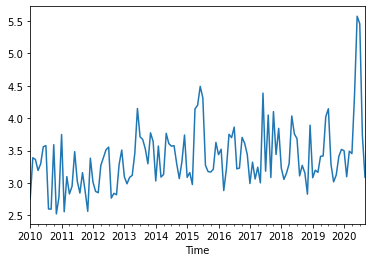

In [8]:
WindSpeed.resample('M') ['Speed'].mean().plot()

# problem3

## 3.1 

In [9]:
SLP=pd.read_csv("problem3data.csv")
SLP

,STATION,DATE,SLP,TMP
0,59493099999,2010-01-02T00:00:00,"10161,1","+0161,1"
1,59493099999,2010-01-02T01:00:00,"99999,9","+0170,1"
2,59493099999,2010-01-02T02:00:00,"99999,9","+0180,1"
3,59493099999,2010-01-02T03:00:00,"10169,1","+0192,1"
4,59493099999,2010-01-02T04:00:00,"99999,9","+0180,1"
...,...,...,...,...
8705,59493099999,2010-12-31T19:00:00,"99999,9","+0130,1"
8706,59493099999,2010-12-31T20:00:00,"99999,9","+0130,1"
8707,59493099999,2010-12-31T21:00:00,"10188,1","+0120,1"
8708,59493099999,2010-12-31T22:00:00,"99999,9","+0110,1"


In [13]:
def splitSLP(x,num):
    strs=x.split(',')[num]
    if num==0:#sea level pressure
        if strs=='99999':#no value
            return np.nan
        else:
            return float(strs)/10
    else:
        return int(strs)

def splitTMP(x,num):
    strs=x.split(',')[num]
    if num==0:
        if strs=='9999':#no value
            return np.nan
        else:
            return float(strs)/10
    else:
        return int(x.split(',')[num])
    
SLP['seeLevelPressure']=SLP['SLP'].apply(splitSLP,num=0)
SLP['seeLevelPressureQuality']=SLP['SLP'].apply(splitSLP,num=1)
SLP['airTemperature']=SLP['TMP'].apply(splitTMP,num=0)
SLP['airTemperatureQuality']=SLP['TMP'].apply(splitTMP,num=1)
SLP=SLP.dropna()
SLP

,STATION,DATE,SLP,TMP,seeLevelPressure,seeLevelPressureQuality,airTemperature,airTemperatureQuality
0,59493099999,2010-01-02T00:00:00,"10161,1","+0161,1",1016.1,1,16.1,1
3,59493099999,2010-01-02T03:00:00,"10169,1","+0192,1",1016.9,1,19.2,1
6,59493099999,2010-01-02T06:00:00,"10146,1","+0184,1",1014.6,1,18.4,1
9,59493099999,2010-01-02T09:00:00,"10149,1","+0160,1",1014.9,1,16.0,1
12,59493099999,2010-01-02T12:00:00,"10167,1","+0156,1",1016.7,1,15.6,1
...,...,...,...,...,...,...,...,...
8695,59493099999,2010-12-31T09:00:00,"10171,1","+0176,1",1017.1,1,17.6,1
8698,59493099999,2010-12-31T12:00:00,"10181,1","+0153,1",1018.1,1,15.3,1
8701,59493099999,2010-12-31T15:00:00,"10188,1","+0142,1",1018.8,1,14.2,1
8704,59493099999,2010-12-31T18:00:00,"10188,1","+0131,1",1018.8,1,13.1,1


## 3.2

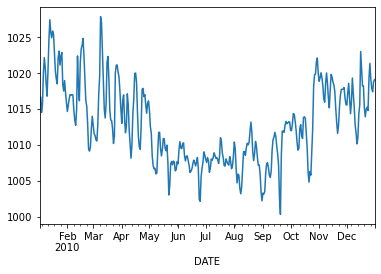

In [15]:
SLP['DATE']= pd.to_datetime(SLP['DATE'])
SLP=SLP.set_index('DATE')
SLP.resample('D')['seeLevelPressure'].mean().plot()

## 3.3

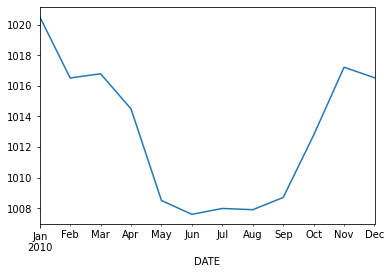

In [22]:
SLP.resample('M')['seeLevelPressure'].mean().plot()

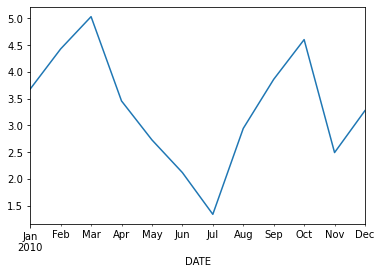

In [23]:
SLP.resample('M')['seeLevelPressure'].std().plot()

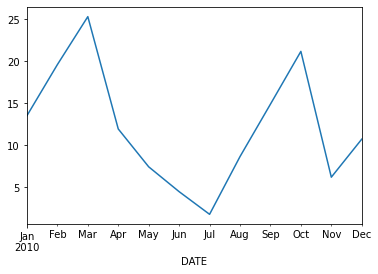

In [41]:
SLP.resample('M')['seeLevelPressure'].var().plot()

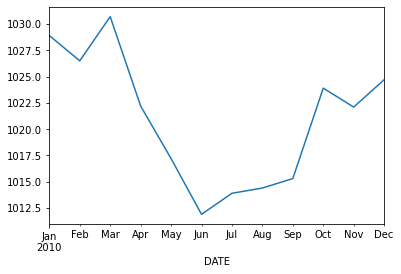

In [39]:
SLP.resample('M')['seeLevelPressure'].max().plot()

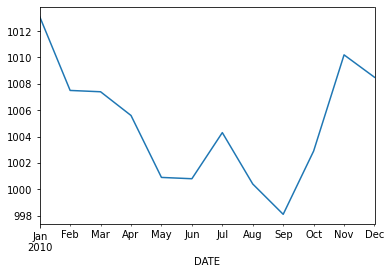

In [40]:
SLP.resample('M')['seeLevelPressure'].min().plot()